Pertama, Anda perlu mengaitkan akun Google Drive Anda dengan Google Colab agar dapat mengakses file yang ada di dalamnya. Jalankan kode berikut di sel Google Colab

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Selanjutnya panggil dataset yang di google **drive**

In [7]:
!unzip '/content/drive/My Drive/KB/dataset.zip'

Archive:  /content/drive/My Drive/KB/dataset.zip
  inflating: images/cat/cat_1.jpg    
  inflating: images/cat/cat_10.jpg   
  inflating: images/cat/cat_100.jpg  
  inflating: images/cat/cat_101.jpg  
  inflating: images/cat/cat_102.jpg  
  inflating: images/cat/cat_103.jpg  
  inflating: images/cat/cat_104.jpg  
  inflating: images/cat/cat_105.jpg  
  inflating: images/cat/cat_106.jpg  
  inflating: images/cat/cat_107.jpg  
  inflating: images/cat/cat_108.jpg  
  inflating: images/cat/cat_109.jpeg  
  inflating: images/cat/cat_11.jpg   
  inflating: images/cat/cat_110.jpeg  
  inflating: images/cat/cat_111.jpeg  
  inflating: images/cat/cat_112.jpg  
  inflating: images/cat/cat_113.jpg  
  inflating: images/cat/cat_114.jpg  
  inflating: images/cat/cat_115.jpg  
  inflating: images/cat/cat_116.jpg  
  inflating: images/cat/cat_117.jpg  
  inflating: images/cat/cat_118.jpg  
  inflating: images/cat/cat_119.jpg  
  inflating: images/cat/cat_12.jpg   
  inflating: images/cat/cat_120.jpg 

SPLIT DATASET
DATASET DI SPLIT DENGAN RASIO 80,10,**10**

In [8]:

!pip install split-folders

In [9]:
import splitfolders

In [11]:
splitfolders.ratio("images",
                   output="dataset_final",
                   seed = 1337,
                   ratio=(.8,.1,.1))

Copying files: 646 files [00:00, 7415.89 files/s]


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MENGUBAH BENTUK GAMBAR DARI TRAIN DAN **VAL**

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [24]:
train_generator  = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

Found 516 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


Import Library

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

MEMBUAT MODEL

In [26]:
model = Sequential([

    Conv2D(16,(3,3), activation = 'relu', input_shape = (68,68,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

MEMBUAT FITUR CALLBACK DAN MELATIH **MODEL**

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [28]:
history = model.fit(train_generator, epochs = 50,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/50
17/17 [==============================] - 5s 236ms/step - loss: 0.7369 - accuracy: 0.4942 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 3s 188ms/step - loss: 0.6565 - accuracy: 0.5891 - val_loss: 0.8962 - val_accuracy: 0.5312
Epoch 3/50
17/17 [==============================] - 3s 172ms/step - loss: 0.6832 - accuracy: 0.5795 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 4/50
17/17 [==============================] - 3s 176ms/step - loss: 0.6602 - accuracy: 0.5853 - val_loss: 0.6684 - val_accuracy: 0.5625
Epoch 5/50
17/17 [==============================] - 4s 243ms/step - loss: 0.6481 - accuracy: 0.6240 - val_loss: 0.6509 - val_accuracy: 0.5781
Epoch 6/50
17/17 [==============================] - 3s 183ms/step - loss: 0.6267 - accuracy: 0.6609 - val_loss: 0.6251 - val_accuracy: 0.6719
Epoch 7/50
17/17 [==============================] - 3s 174ms/step - loss: 0.6147 - accuracy: 0.6492 - val_loss: 0.6041 - val_accuracy: 0.6719
Epoch 

In [29]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

Found 66 images belonging to 2 classes.


EVALUATE HASIL MODEL

In [30]:
model.evaluate(test_generator)

3/3 [==============================] - 0s 29ms/step - loss: 0.5841 - accuracy: 0.7121


[0.5841425061225891, 0.7121211886405945]

Grafik Accuracy

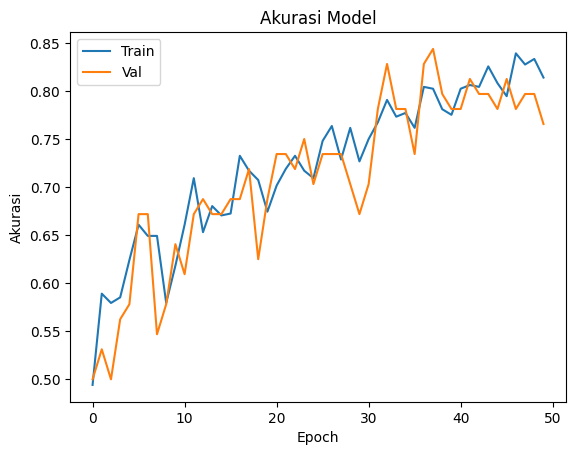

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Grafik Loss

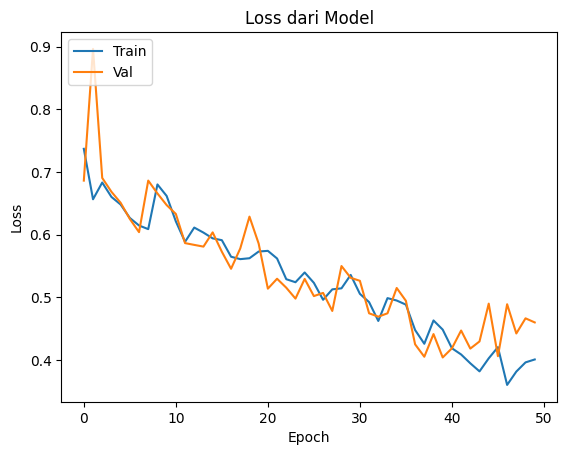

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()